In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df_raw = pd.read_csv('../Data/concrete_data.csv')
df_raw.head(5)

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [61]:
df_raw.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


(array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(1, 0, 'Cement'),
  Text(2, 0, 'Blast Furnace Slag'),
  Text(3, 0, 'Fly Ash'),
  Text(4, 0, 'Water'),
  Text(5, 0, 'Superplasticizer'),
  Text(6, 0, 'Coarse Aggregate'),
  Text(7, 0, 'Fine Aggregate'),
  Text(8, 0, 'Age'),
  Text(9, 0, 'Strength')])

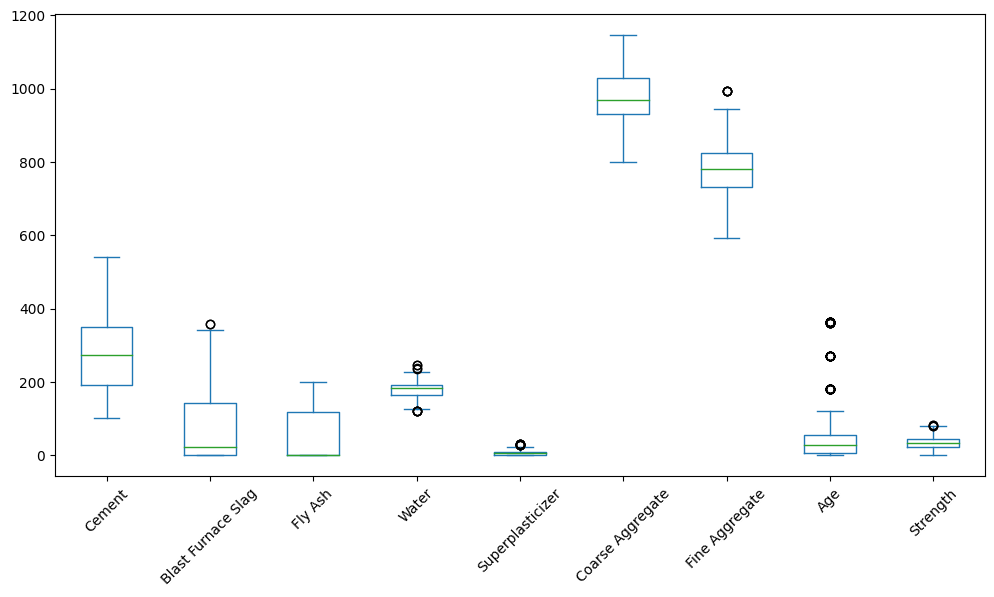

In [62]:
df_raw.plot(kind='box', figsize=(12, 6))
plt.xticks(rotation=45)

Course aggregate for scaling - uppser and lower bounds known, no outliers, even though its more of a normal distrubution the tails are not too thin

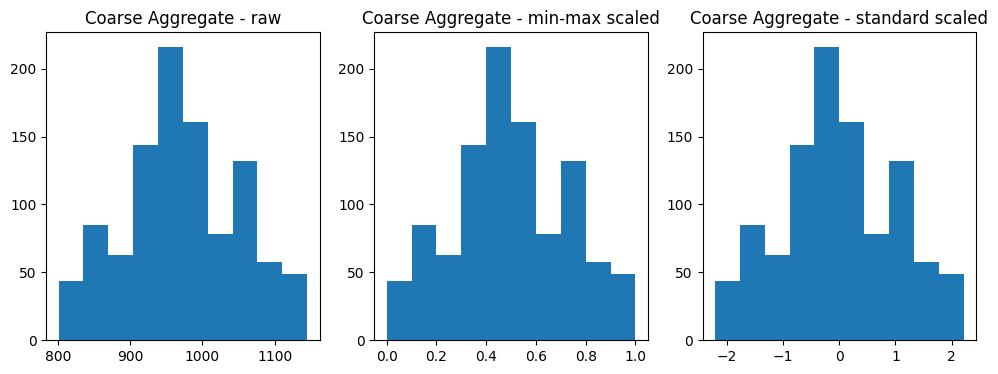

In [63]:
fig, ((ax1, ax2, ax3)) = plt.subplots(1, 3, figsize=(12, 4))

ax1.hist(df_raw['Coarse Aggregate'])
ax1.set_title('Coarse Aggregate - raw')

ca_min = df_raw['Coarse Aggregate'].min()
ca_max = df_raw['Coarse Aggregate'].max()
ax2.hist(df_raw['Coarse Aggregate'].apply(lambda x: (x - ca_min) / (ca_max - ca_min)))
ax2.set_title('Coarse Aggregate - min-max scaled')

ca_mean = df_raw['Coarse Aggregate'].mean()
ca_std = df_raw['Coarse Aggregate'].std()
ax3.hist(df_raw['Coarse Aggregate'].apply(lambda x: (x - ca_mean) / (ca_std)))
ax3.set_title('Coarse Aggregate - standard scaled')

fig.show()


We will use age to demonstrate feature clipping, even though we know this age is cement age and not human age and does not have a certain max we see that it has relatively big outliers

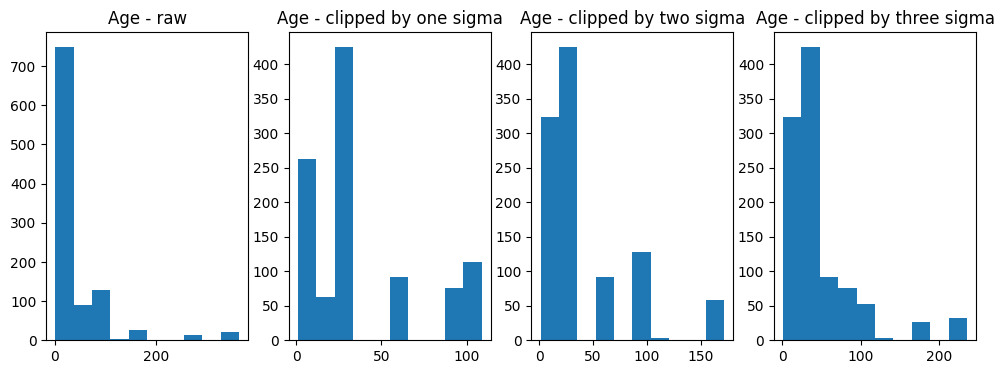

In [72]:
age_mean = df_raw['Age'].mean()
age_std = df_raw['Age'].std()

def age_trim(value, factor):
    max_value = age_mean + factor * age_std
    return np.array([value, max_value]).min()

fig, ((ax1, ax2, ax3, ax4)) = plt.subplots(1, 4, figsize=(12, 4))

ax1.hist(df_raw['Age'])
ax1.set_title('Age - raw')

ax2.hist(df_raw['Age'].apply(lambda x: age_trim(x, 1)))
ax2.set_title('Age - clipped by 1-sig')

ax3.hist(df_raw['Age'].apply(lambda x: age_trim(x, 2)))
ax3.set_title('Age - clipped by 2-sig')

ax4.hist(df_raw['Age'].apply(lambda x: age_trim(x, 3)))
ax4.set_title('Age - clipped by 3-sig')

fig.show()

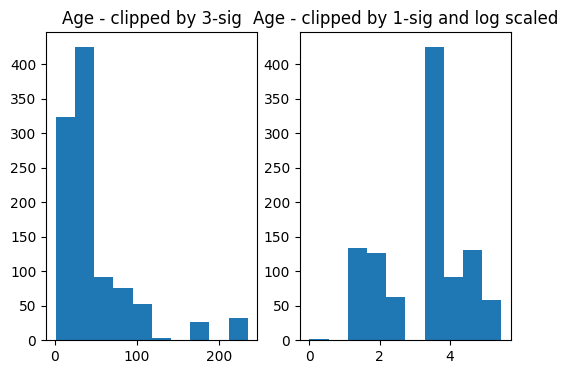

In [77]:
fig, ((ax1, ax2)) = plt.subplots(1, 2, figsize=(6, 4))

ax1.hist(df_raw['Age'].apply(lambda x: age_trim(x, 3)))
ax1.set_title('Age - clipped by 3-sig')

ax2.hist(np.log(df_raw['Age'].apply(lambda x: age_trim(x, 3))))
ax2.set_title('Age - clipped by 1-sig and log scaled')

fig.show()

<AxesSubplot:>

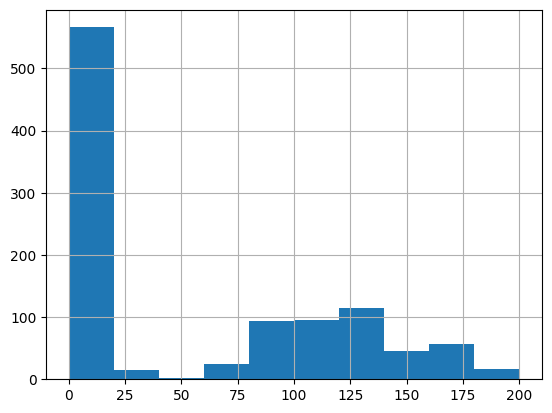

In [78]:
df_raw['Fly Ash'].hist()

TypeError: bar() missing 1 required positional argument: 'height'